# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save the needed information into arrays
all_cities = []
lon = []
lat = []
lat = []
max_temp = []
humidity = []
clouds = []
winds = []
country = []
temp_date = []

# Initial counters
count = 0
set = 1

# Start the url for the api call
units = "metric"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="

print("Beginning Data Retrieval")
print("-----------------------------")

# Loop through the list of cities and perform a request for data on each
for city in cities:
    
    # If there have been 50 calls, make it sleep so we don't do too many calls in api limit
    if count == 49:
        time.sleep(1)
        count = 0
        set+= 1
    else:
        count +=1
     
    # Reguest the data and convert to json
    response = requests.get(url + city).json()
    
    # Try to get the data from the response
    try:
        lon.append(response['coord']['lon'])
        lat.append(response['coord']['lat'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        clouds.append(response['clouds']['all'])
        winds.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        temp_date.append(response['dt'])
        all_cities.append(city)
        
        print(f"Processing Record {count} of set {set} | {city}")
        
    # If the api call did not work
    except:
        print(f"{city} not found. Skipping...")
        
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")



Beginning Data Retrieval
-----------------------------
Processing Record 1 of set 1 | rikitea
Processing Record 2 of set 1 | busselton
Processing Record 3 of set 1 | jamestown
Processing Record 4 of set 1 | bengkulu
angra not found. Skipping...
Processing Record 6 of set 1 | bowen
Processing Record 7 of set 1 | luderitz
Processing Record 8 of set 1 | sitka
Processing Record 9 of set 1 | avarua
Processing Record 10 of set 1 | kokopo
Processing Record 11 of set 1 | batemans bay
amderma not found. Skipping...
Processing Record 13 of set 1 | baculin
tsihombe not found. Skipping...
Processing Record 15 of set 1 | victoria
Processing Record 16 of set 1 | bethel
Processing Record 17 of set 1 | mataura
Processing Record 18 of set 1 | puerto ayora
grand river south east not found. Skipping...
Processing Record 20 of set 1 | kaz
Processing Record 21 of set 1 | yar-sale
Processing Record 22 of set 1 | mandalgovi
Processing Record 23 of set 1 | salvador
Processing Record 24 of set 1 | bluff
Proces

Processing Record 3 of set 5 | kilindoni
Processing Record 4 of set 5 | ilulissat
Processing Record 5 of set 5 | lompoc
Processing Record 6 of set 5 | vestmannaeyjar
Processing Record 7 of set 5 | baykit
rungata not found. Skipping...
Processing Record 9 of set 5 | maniitsoq
Processing Record 10 of set 5 | avera
Processing Record 11 of set 5 | newcastle
Processing Record 12 of set 5 | hami
Processing Record 13 of set 5 | atasu
Processing Record 14 of set 5 | boguchany
Processing Record 15 of set 5 | petauke
Processing Record 16 of set 5 | ahipara
Processing Record 17 of set 5 | chokurdakh
Processing Record 18 of set 5 | ngunguru
Processing Record 19 of set 5 | acajutla
Processing Record 20 of set 5 | verkhnevilyuysk
Processing Record 21 of set 5 | pecos
ozgon not found. Skipping...
Processing Record 23 of set 5 | hayden
Processing Record 24 of set 5 | carnot
Processing Record 25 of set 5 | bubaque
Processing Record 26 of set 5 | faanui
Processing Record 27 of set 5 | east wenatchee ben

Processing Record 8 of set 9 | grand forks
Processing Record 9 of set 9 | kaitangata
Processing Record 10 of set 9 | rio grande
Processing Record 11 of set 9 | deputatskiy
kazalinsk not found. Skipping...
Processing Record 13 of set 9 | clyde river
Processing Record 14 of set 9 | mehamn
Processing Record 15 of set 9 | matamoros
Processing Record 16 of set 9 | angoche
Processing Record 17 of set 9 | saint-philippe
Processing Record 18 of set 9 | upington
el mahalla el kubra not found. Skipping...
Processing Record 20 of set 9 | wahiawa
Processing Record 21 of set 9 | bumba
Processing Record 22 of set 9 | narsaq
Processing Record 23 of set 9 | puerto escondido
Processing Record 24 of set 9 | sola
Processing Record 25 of set 9 | minyar
Processing Record 26 of set 9 | traverse city
Processing Record 27 of set 9 | smidovich
Processing Record 28 of set 9 | dawson creek
Processing Record 29 of set 9 | girne
Processing Record 30 of set 9 | blagoveshchensk
Processing Record 31 of set 9 | osa
Pr

Processing Record 6 of set 13 | quang ngai
Processing Record 7 of set 13 | kozhva
himora not found. Skipping...
Processing Record 9 of set 13 | puerto carreno
Processing Record 10 of set 13 | naantali
Processing Record 11 of set 13 | halle
Processing Record 12 of set 13 | kirovskiy
Processing Record 13 of set 13 | ulladulla
Processing Record 14 of set 13 | youkounkoun
temaraia not found. Skipping...
Processing Record 16 of set 13 | chengde
Processing Record 17 of set 13 | harper
Processing Record 18 of set 13 | owando
Processing Record 19 of set 13 | kuruman
Processing Record 20 of set 13 | nakamura
gurgan not found. Skipping...
Processing Record 22 of set 13 | pocone
Processing Record 23 of set 13 | concepcion
Processing Record 24 of set 13 | gangapur
-----------------------------
Data Retrieval Complete
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
# Make a dictionary
weather_dict = {
    "City": all_cities,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": max_temp,
    "Humidity": humidity,
    "Cloudiness": clouds,
    "Wind Speed": winds,
    "Country": country,
    "Date": temp_date
}

# Convert to data frame
weather_data = pd.DataFrame(weather_dict)

# Save to .csv
weather_data.to_csv('../output_data/cities.csv', index=False)

# Print out first 5 rows
weather_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,19.43,59,100,6.22,PF,1595453499
1,busselton,-33.65,115.33,13.89,53,37,9.34,AU,1595453423
2,jamestown,42.10,-79.24,26.67,73,20,5.70,US,1595453169
3,bengkulu,-3.80,102.27,23.30,88,90,1.98,ID,1595453499
4,bowen,-20.02,148.23,17.22,93,90,2.10,AU,1595453499


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
# Check if any cities have a humidity more than100%
humid_cities = weather_data.loc[weather_data['Humidity'] > 100, : ]
humid_cities

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


In [6]:
#  Get the indices of cities that have humidity over 100%.
humid_list = humid_cities.index
humid_list

Int64Index([], dtype='int64')

In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = weather_data[weather_data["Humidity"] <= 100]
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,19.43,59,100,6.22,PF,1595453499
1,busselton,-33.65,115.33,13.89,53,37,9.34,AU,1595453423
2,jamestown,42.10,-79.24,26.67,73,20,5.70,US,1595453169
3,bengkulu,-3.80,102.27,23.30,88,90,1.98,ID,1595453499
4,bowen,-20.02,148.23,17.22,93,90,2.10,AU,1595453499
...,...,...,...,...,...,...,...,...,...
562,kuruman,-27.45,23.43,5.56,38,0,2.46,ZA,1595453628
563,nakamura,32.98,132.93,25.46,88,99,0.71,JP,1595453628
564,pocone,-16.26,-56.62,26.80,26,0,1.41,BR,1595453629
565,concepcion,-36.83,-73.05,13.00,71,75,2.10,CL,1595453629


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

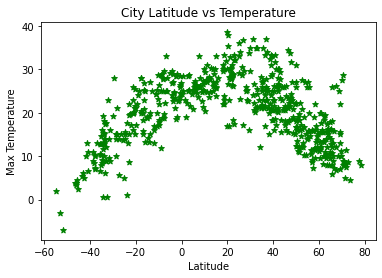

In [8]:
# Create the scattor plot graphs

plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="*", color="green")
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature")

# Save the graph
plt.savefig('../output_data/fig1.png')

plt.show()

## Latitude vs. Humidity Plot

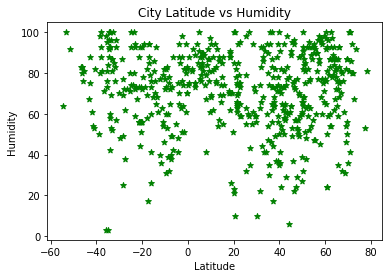

In [9]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="*", color="green")
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Save the graph
plt.savefig("../output_data/fig2.png")

plt.show()

## Latitude vs. Cloudiness Plot

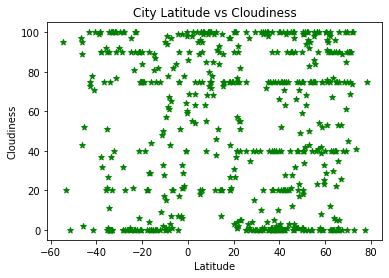

In [10]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="*", color="green")
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Save the graph
plt.savefig("../output_data/fig3.png")

plt.show()

## Latitude vs. Wind Speed Plot

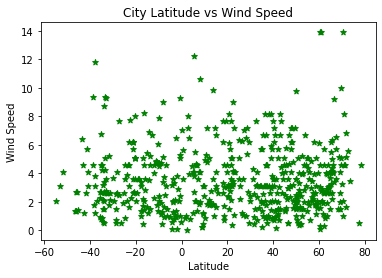

In [11]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="*", color="green")
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Save the graph
plt.savefig("../output_data/fig4.png")

plt.show()

## Linear Regression

In [12]:
# OPTIONAL: Create a function to create Linear Regression plots

In [13]:
# Create Northern and Southern Hemisphere DataFrames
northern_city_data = clean_city_data[clean_city_data["Lat"] > 0]
southern_city_data = clean_city_data[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and max temp is: -0.68


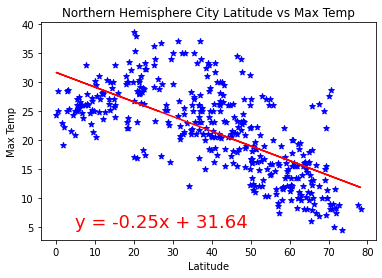

In [15]:
# Do the linear regressions

x_axis = northern_city_data["Lat"]
y_axis = northern_city_data["Max Temp"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (5,5), fontsize=18, color="red")

plt.title("Northern Hemisphere City Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The correlation between latitude and max temp is: {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation between latitude and max temp is: 0.81


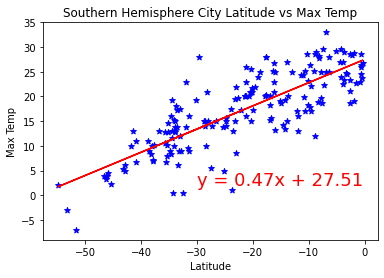

In [16]:
x_axis = southern_city_data["Lat"]
y_axis = southern_city_data["Max Temp"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (-30,2), fontsize=18, color="red")

plt.title("Southern Hemisphere City Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

print(f"The correlation between latitude and max temp is: {round(correlation[0],2)}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and humidity is: -0.03


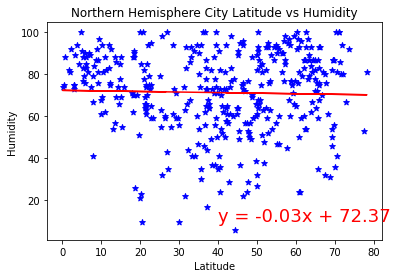

In [17]:
x_axis = northern_city_data["Lat"]
y_axis = northern_city_data["Humidity"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (40,10), fontsize=18, color="red")

plt.title("Northern Hemisphere City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The correlation between latitude and humidity is: {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation between latitude and humidity is: -0.21


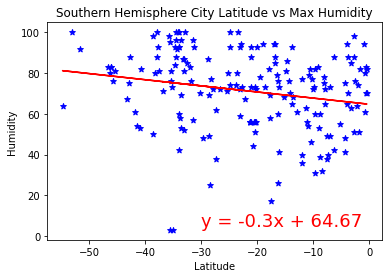

In [18]:
x_axis = southern_city_data["Lat"]
y_axis = southern_city_data["Humidity"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (-30,5), fontsize=18, color="red")

plt.title("Southern Hemisphere City Latitude vs Max Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

print(f"The correlation between latitude and humidity is: {round(correlation[0],2)}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and cloudiness is: -0.08


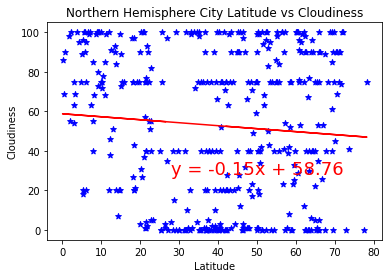

In [19]:
x_axis = northern_city_data["Lat"]
y_axis = northern_city_data["Cloudiness"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (28,28), fontsize=18, color="red")

plt.title("Northern Hemisphere City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The correlation between latitude and cloudiness is: {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation between latitude and cloudiness is: -0.09


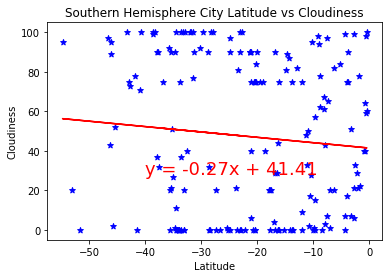

In [20]:
x_axis = southern_city_data["Lat"]
y_axis = southern_city_data["Cloudiness"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (-40,28), fontsize=18, color="red")

plt.title("Southern Hemisphere City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

print(f"The correlation between latitude and cloudiness is: {round(correlation[0],2)}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and wind speed is: -0.01


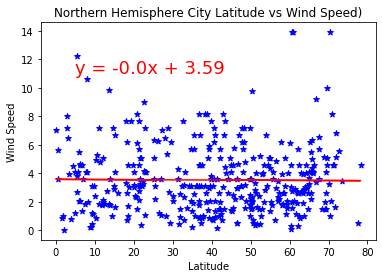

In [21]:
x_axis = northern_city_data["Lat"]
y_axis = northern_city_data["Wind Speed"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (5,11), fontsize=18, color="red")

plt.title("Northern Hemisphere City Latitude vs Wind Speed)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The correlation between latitude and wind speed is: {round(correlation[0],2)}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation between latitude and wind speed is: -0.05


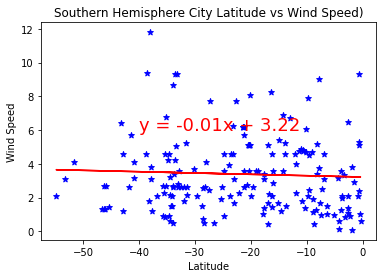

In [22]:
x_axis = southern_city_data["Lat"]
y_axis = southern_city_data["Wind Speed"]

correlation = st.pearsonr(x_axis, y_axis)

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="*", color="blue")
plt.plot(x_axis,regress_values, 'r-')
plt.annotate(line_eq, (-40,6), fontsize=18, color="red")

plt.title("Southern Hemisphere City Latitude vs Wind Speed)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

print(f"The correlation between latitude and wind speed is: {round(correlation[0],2)}")

plt.show()